In [1]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import matplotlib
sns.set()

In [60]:
dataset = pd.read_csv("cvlibd/server/data/volume-render/rho_max.csv")
df = pd.read_csv("cvlibd/server/data/volume-render/tev.csv")
df2 = pd.read_csv("cvlibd/server/data/volume-render/v03.csv")

<AxesSubplot:>

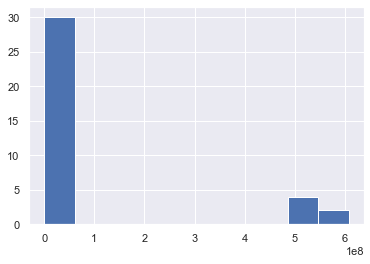

In [36]:
dataset[dataset.rho.notnull()].rho.hist()

In [21]:
import os
files = os.listdir("data")

x_axis = [0.1141, 0.2286, 0.4566, 0.6817, 0.8948, 1.0487, 1.2244, 1.3306, 1.5159, 1.6898, 1.7954, 1.8741, 1.9021, 1.9749, 2.055, 2.201, 2.3341, 2.4095, 2.5659, 2.6103, 2.797, 2.8245, 2.9693, 3.0068, 3.3719, 3.5332, 3.6069, 3.7669, 3.9067, 4.1035, 4.4262, 4.6984, 4.8989, 4.9275, 4.9577, 4.9978]

df = pd.read_csv("cvlibd/server/data/volume-render/v02_splash.csv")

df.columns

df.insert(2, "x_axis", x_axis)

df = df.head(31)

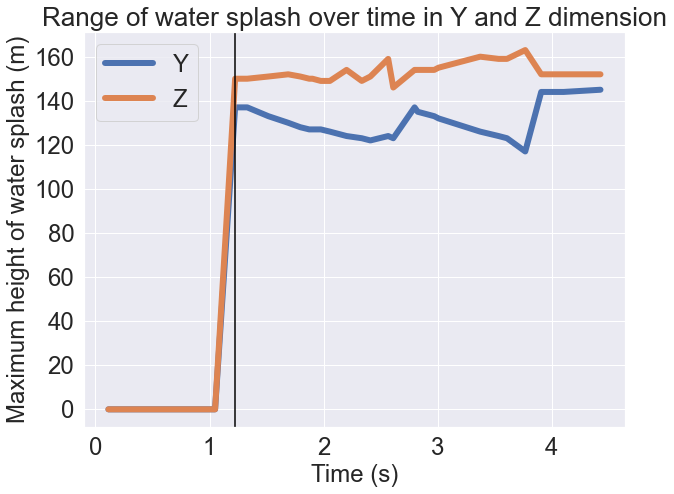

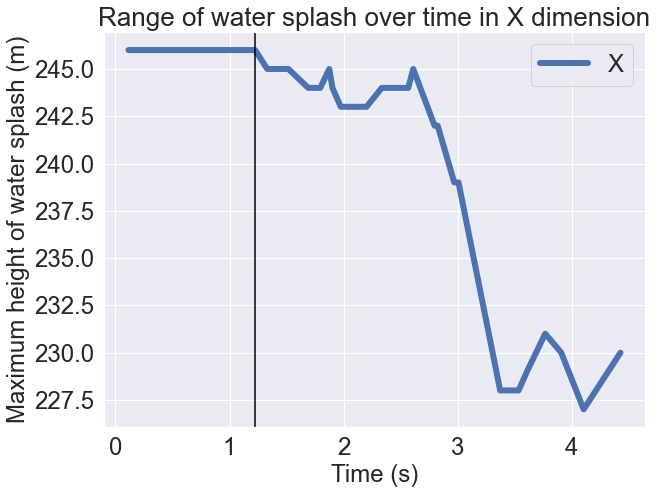

In [30]:
fontsize = 24

sns.set(rc={'figure.figsize':(9.7,7.27)})
df.plot(x="x_axis", y=["x", "z"], fontsize=fontsize, linewidth=6)
plt.legend(["Y", "Z"], loc="best", fontsize=fontsize)
plt.title("Range of water splash over time in Y and Z dimension", fontsize=fontsize + 2)
plt.xlabel("Time (s)", fontsize=fontsize)
plt.ylabel("Maximum height of water splash (m)", fontsize=fontsize)
plt.axvline(x = x_axis[6], color="black")
plt.savefig("GIFS/zy_dimension")
plt.show()


# df.plot(x="x_axis", y=["y"])
# plt.legend(["X"], loc="best")
# plt.show()

df.plot(x="x_axis", y=["y"], fontsize=fontsize, linewidth=6)
plt.legend(["X"], loc="best", fontsize=fontsize)
plt.title("Range of water splash over time in X dimension", fontsize=fontsize + 2)
plt.xlabel("Time (s)", fontsize=fontsize)
plt.ylabel("Maximum height of water splash (m)", fontsize=fontsize)
plt.savefig("GIFS/x_dimension")
plt.axvline(x = x_axis[6], color="black")
plt.show()

In [56]:
tev = pd.read_csv("cvlibd/server/data/volume-render/tev.csv")
prs = pd.read_csv("cvlibd/server/data/volume-render/prs.csv")
v03 = pd.read_csv("cvlibd/server/data/volume-render/v03.csv")
combined = pd.concat([tev.tev, prs.prs, v03.v03 ],axis=1)


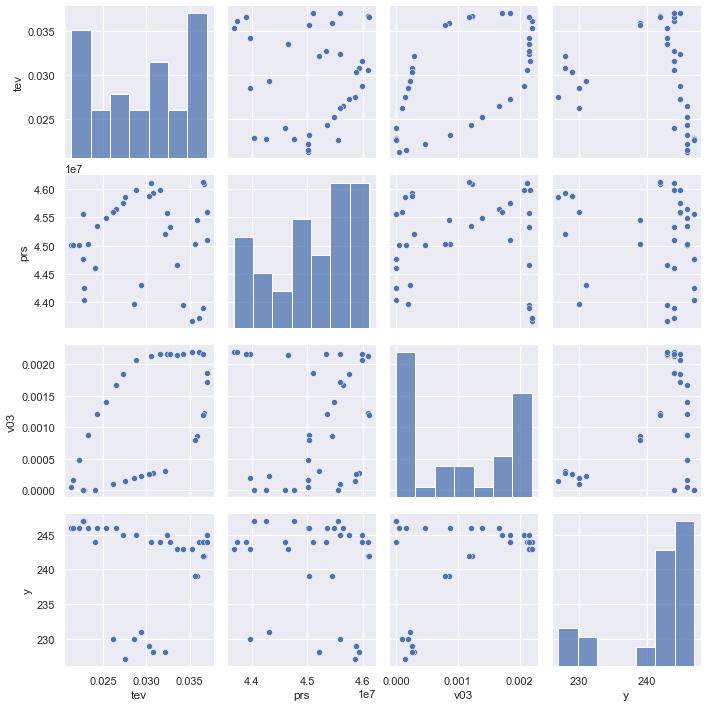

In [46]:
sns.pairplot(combined)
# corr = combined.corr()
# sns.heatmap(corr)

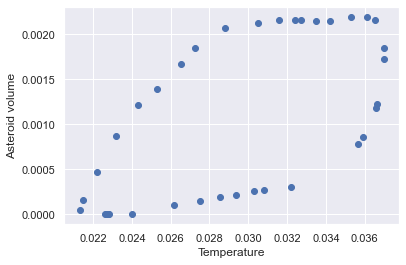

In [50]:
plt.scatter(tev.tev, v03.v03)
plt.xlabel("Temperature")
plt.ylabel("Asteroid volume")
plt.show()

In [61]:
total = []
for i in files:
    if i != ".DS_Store":
        total.append(int(i.split("_")[3].replace(".vti", ""))/10000 )

total.sort()

df.insert(2, "time", x_axis)
df.insert(2, "v03", df2.v03)

# new = combined.insert(2, "time", x_axis)


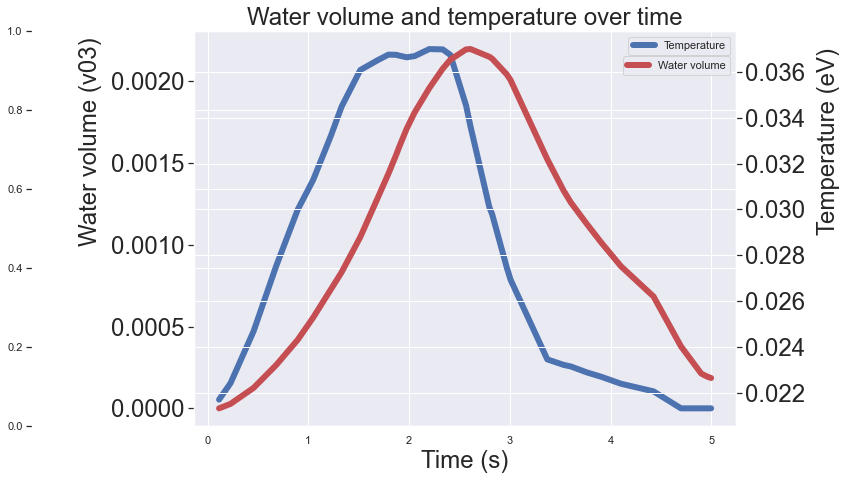

In [65]:
fontsize = 24

sns.set(rc={'figure.figsize':(9.7,7.27)})

# sns.set(rc={'figure.figsize':(10.7,7.27)})
fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax.spines['left']
rspine.set_position(('axes', -0.3))
# ax3.set_frame_on(True)
# ax3.patch.set_visible(False)
# fig.subplots_adjust(right=0.5)

df.plot(ax=ax3, x="time", y="v03",style='b-', secondary_y=False, linewidth=6, label="Temperature", fontsize=fontsize, legend=False);
df.plot(ax=ax3, x="time", y="tev", style='r-', secondary_y=True,linewidth=6,  label="Water Volume (v03)", fontsize=fontsize, legend=False);
plt.xlabel("Time (s)", fontsize=fontsize)
# plt.ylabel("Water volume (v03)", fontsize=fontsize)
ax3.set_ylabel("Temperature (eV)", fontsize=fontsize)
ax.set_ylabel("Water volume (v03)", fontsize=fontsize)
ax.set_xlabel("Time (s)", fontsize=fontsize)
ax3.legend(["Temperature"], loc="upper right")
ax.yaxis.set_label_coords(-0.17, 0.72)
ax3.yaxis.set_label_coords(1.15, 0.72)
plt.legend(["Water volume"], loc="best", bbox_to_anchor=(1,0.95))
plt.title("Water volume and temperature over time", fontsize=fontsize)

# plt.show()

plt.savefig("GIFS/water_temp")
plt.show()

